# DDPG for the Crawler environment 

---

This notebook is based on the notebook of the coding exercice [DDPG-pendulum](https://github.com/udacity/deep-reinforcement-learning/tree/master/ddpg-pendulum) of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.


Here, we will train a DDPG agent in the Crawler environment.


### 1. Import the Necessary Packages

We begin by importing the necessary packages.

In [1]:
from unityagents import UnityEnvironment
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

### 2. Instantiate the Environment and Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you can downloaded it from [here](https://github.com/udacity/deep-reinforcement-learning/tree/master/p2_continuous-control).

- **Mac**: `"path/to/Crawler.app"`
- **Windows** (x86): `"path/to/Crawler_Windows_x86/Crawler.exe"`
- **Windows** (x86_64): `"path/to/Crawler_Windows_x86_64/Crawler.exe"`
- **Linux** (x86): `"path/to/Crawler_Linux/Crawler.x86"`
- **Linux** (x86_64): `"path/to/Crawler_Linux/Crawler.x86_64"`
- **Linux** (x86, headless): `"path/to/Crawler_Linux_NoVis/Crawler.x86"`
- **Linux** (x86_64, headless): `"path/to/Crawler_Linux_NoVis/Crawler.x86_64"`

For instance, if you are using a Mac, then you downloaded `Crawler.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Crawler.app")
```

In [2]:
env = UnityEnvironment(file_name='Crawler_Windows_x86_64/Crawler.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: CrawlerBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 129
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 20
        Vector Action descriptions: , , , , , , , , , , , , , , , , , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

#### Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 12
Size of each action: 20
There are 12 agents. Each observes a state with length: 129
The state for the first agent looks like: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.25000000e+00
  1.00000000e+00  0.00000000e+00  1.78813934e-07  0.00000000e+00
  1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.06093168e-01 -1.42857209e-01 -6.06078804e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.33339906e+00 -1.42857209e-01
 -1.33341408e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.0609

In [5]:
# Initialise the agent
agent = Agent(state_size, action_size, random_seed=1)

### 3. Train the Agent with DDPG

Run the code cell below to train the agent from scratch.  Alternatively, you can skip to the next code cell to load the pre-trained weights from file.

In [6]:
def ddpg(n_episodes=200, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        agent.reset()
        score = 0
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)
                
            states = next_states
            score += np.mean(rewards)                         # update the score (for each agent)
            if np.any(dones):
                break 
                
        scores_deque.append(score)
        scores.append(score)
        mean=np.mean(scores_deque)
        
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, mean , score), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, mean))
        if  mean>max_score:
            max_score=mean
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_Crawler.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_Crawler.pth')
            
    return scores

In [7]:
scores = ddpg(2000)

Episode 100	Average Score: 2.65	Score: 3.95
Episode 200	Average Score: 4.90	Score: 8.759
Episode 300	Average Score: 5.81	Score: 6.792
Episode 400	Average Score: 2.67	Score: 8.131
Episode 500	Average Score: 4.18	Score: 4.930
Episode 600	Average Score: 4.53	Score: 6.590
Episode 700	Average Score: 6.59	Score: 8.185
Episode 800	Average Score: 9.67	Score: 5.083
Episode 900	Average Score: 10.71	Score: 11.76
Episode 1000	Average Score: 12.40	Score: 12.54
Episode 1100	Average Score: 14.47	Score: 23.31
Episode 1200	Average Score: 14.91	Score: 16.67
Episode 1300	Average Score: 23.72	Score: 31.93
Episode 1400	Average Score: 20.73	Score: 23.70
Episode 1500	Average Score: 24.57	Score: 25.95
Episode 1600	Average Score: 23.99	Score: 13.49
Episode 1700	Average Score: 5.79	Score: 12.675
Episode 1800	Average Score: 20.02	Score: 26.15
Episode 1900	Average Score: 26.22	Score: 28.24
Episode 2000	Average Score: 32.32	Score: 39.80


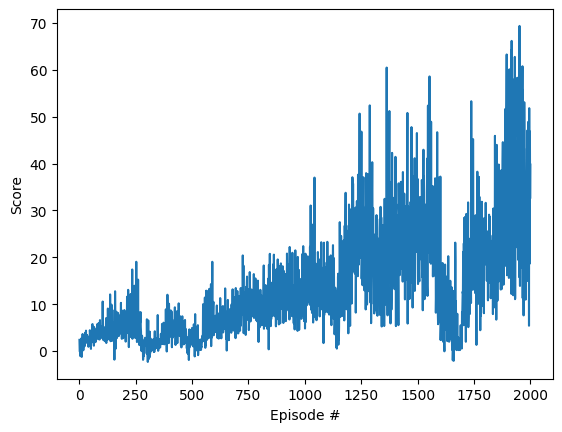

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch the Smart Agent!

In the next code cell, we will load the trained weights and test the model.

In [9]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor_Crawler.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic_Crawler.pth'))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 47.86441034134865


When finished, we can close the environment.

In [10]:
env.close()